In [ ]:
### Calibration Notebook ###
# impliments a multipositional minimisation calibration procudeure to calibrate a 6 axis MEMEs IMU. 
# as inut it requires  data set collected by moving the sensor between a number of distinct stationary positions. 
# takes a data table of the form |t|ax|ay|az|vl|vm|vn|
# outputs calibrattion coefficients for the accelerometer see section 3.2.4 of AO35 and:
# D. Tedaldi, A. Pretto, and E. Menegatti, A robust and easy to implement method for imu calibration without external equipments, 2014.

In [ ]:
### Imports required libaraies ###

import numpy as np
import math as M
import quaternions as Q
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statistics as stats
import scipy.optimize as opt
import functions27 as func
import warnings

In [ ]:
### analyses random noises present in sensor readings and finds the allan variance ###

noise_data=[] # import data
with open("xxxxxx.csv") as file: # opens data file (replace xxxxx with file name)
    noise_data = pd.read_csv(file, delimiter=',',skiprows=[2])
    
leng=noise_data.shape[0] # finds length of data table

allan_tab=pd.DataFrame(index=range(allan_leng),columns=range(4)) # generates new dataframe
allan_tab.columns=["dt","Sigma_a","Sigma_g","n_pos"] # lables collums of ddata table

for row in range(0,allan_leng):
    allan_tab.loc[row,"dt"]=10**((row-100)*0.01) # populates table with time differences
    rows=100*allan_tab.loc[row,"dt"] # converts wait time into number of rows from data table
    n_pos=int(leng/rows) # calculates number of time periods present in data set
    #if n_pos>50:  # limits number of positions for performance benefits. uncomment if code is too slow
    #    n_pos=50
    allan_tab.loc[row,"n_pos"]=n_pos # saves number of positions used
    allan_a=0
    allan_g=0
    for c in range(1,n_pos+1): # loop to calculate allan variance
        allan_a=allan_a+(1/(2*n_pos))*(stats.mean(noise_data.loc[(c-1)*rows:c*rows,"ax"])-stats.mean(noise_data.loc[(c)*rows:(c+1)*rows,"ax"]))**2
        allan_g=allan_g+(1/(2*n_pos))*(stats.mean(noise_data.loc[(c-1)*rows:c*rows,"vl"])-stats.mean(noise_data.loc[(c)*rows:(c+1)*rows,"vl"]))**2
    allan_tab.loc[row,"Sigma_a"]=allan_a # saves values into table
    allan_tab.loc[row,"Sigma_g"]=allan_g
    
allan_tab.to_csv('allan_calibrated.csv', index=False) # writes data frame toa csv file

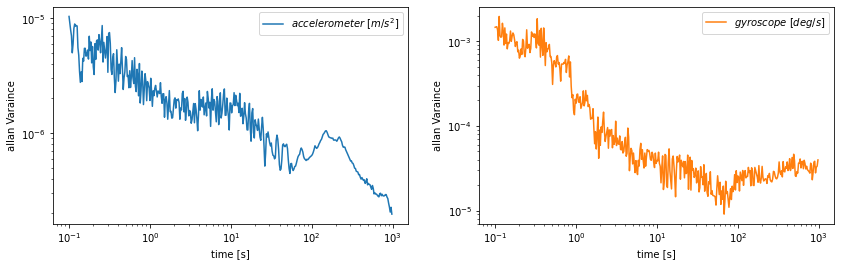

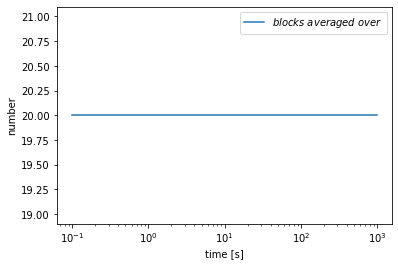

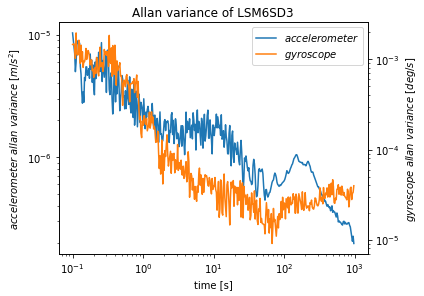

In [5]:
### plots the alan variance for the gyroscope and the accelerometer ### 

allan_data=[] # opens data file
with open("allan_calibrated.csv") as file:
    allan_data = pd.read_csv(file, delimiter=',',skiprows=[2])
    
    
plt.figure(1,figsize=(14, 4)) # side by side plots of of allan variances

plt.subplot(121)
plt.yscale('log')
plt.xscale('log')
plt.plot(allan_data.iloc[:,0],allan_data.iloc[:,1],label=r'$accelerometer\  [m/s^2]$', color='tab:blue')
#plt.plot(allan_tab[:,0],allan_tab[:,2],label=r'$gyroscope\  [deg/s]$')
plt.xlabel("time [s]")
plt.ylabel("allan Varaince")
plt.legend()

plt.subplot(122)
plt.yscale('log')
plt.xscale('log')
#plt.plot(allan_tab[:,0],allan_tab[:,1],label=r'$accelerometer\  [m/s^2]$')
plt.plot(allan_data.iloc[:,0],allan_data.iloc[:,2],label=r'$gyroscope\  [deg/s]$', color='tab:orange')
plt.xlabel("time [s]")
plt.ylabel("allan Varaince")
plt.legend()
plt.show


plt.figure(3) # plots number of positions for reference
plt.xscale('log')
plt.plot(allan_data.iloc[:,0],allan_data.iloc[:,3],label=r'$blocks\ averaged\ over\ $')
#plt.plot(allan_tab[:,0],allan_tab[:,2],label=r'$gyroscope\  [deg/s]$')
plt.xlabel("time [s]")
plt.ylabel("number")
plt.legend()
plt.show
    
ropt=1000

fig, ax1 = plt.subplots() # produces a plot of gyrosopce and accelermeter overlaid on each other

color = 'tab:blue'
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('time [s]')
ax1.set_ylabel(r'$accelerometer\  allan\  variance\  [m/s^2]$')
ax1.plot(allan_data.iloc[:,0],allan_data.iloc[:,1],label=r'$accelerometer$', color=color)


ax2 = ax1.twinx()  # produce a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel(r'$gyroscope\  allan\  variance\  [deg/s]$') 
ax2.plot(allan_data.iloc[:,0],allan_data.iloc[:,2],label=r'$gyroscope$', color=color)

fig.tight_layout()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="upper right")
plt.title("Allan variance of LSM6SD3")
#fig.savefig(fname="allan.png",bbox_inches='tight',pad_inches=0.1) # uncomment this line to ssve the figure
plt.show()

1
1.3603573024756697e-09
[[0. 0. 0. 0. 0.]]
29
`xtol` termination condition is satisfied.
Number of iterations: 845, function evaluations: 10770, CG iterations: 1800, optimality: 2.34e-04, constraint violation: 0.00e+00, execution time: 1.3e+01 s.
2
2.7207146049513394e-09
[[0. 0. 0. 0. 0.]]
31
`xtol` termination condition is satisfied.
Number of iterations: 789, function evaluations: 10040, CG iterations: 2221, optimality: 6.19e-05, constraint violation: 0.00e+00, execution time: 1.4e+01 s.
3
4.081071907427009e-09
[[0. 0. 0. 0. 0.]]
31
`xtol` termination condition is satisfied.
Number of iterations: 799, function evaluations: 10320, CG iterations: 2242, optimality: 9.91e-05, constraint violation: 0.00e+00, execution time: 1.5e+01 s.
4
5.441429209902679e-09
[[0. 0. 0. 0. 0.]]
31
`xtol` termination condition is satisfied.
Number of iterations: 762, function evaluations: 9040, CG iterations: 2511, optimality: 1.18e-05, constraint violation: 0.00e+00, execution time: 1.1e+01 s.
5
6.8017865

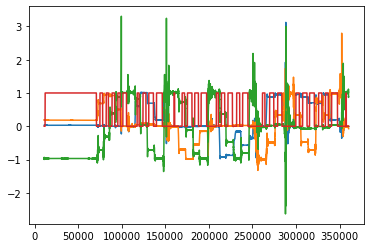

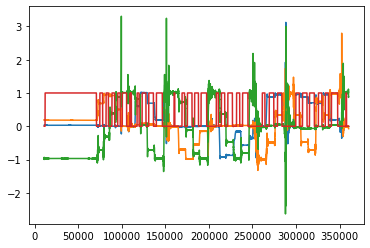

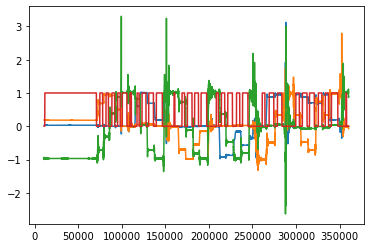

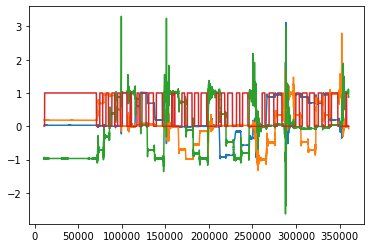

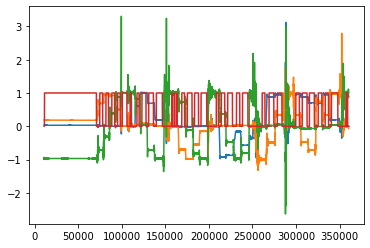

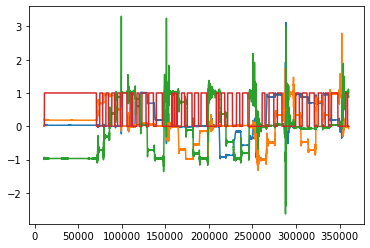

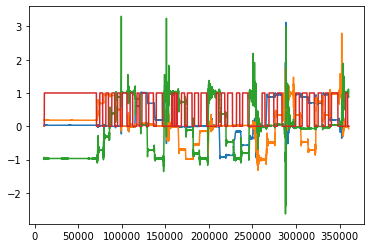

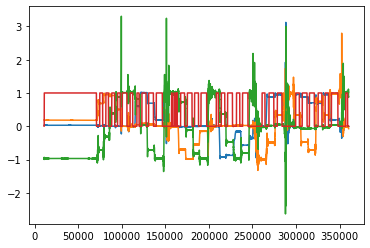

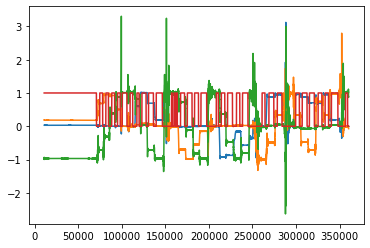

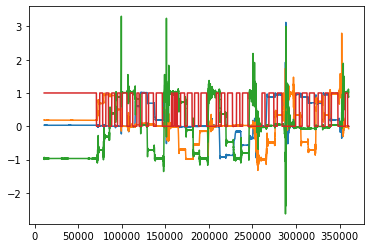

In [2]:
####### Deriving cluster alignment matricies #######
# will parse a raw data set for analysis
# uses the data table of the form |t|ax|ay|az|vl|vm|vn| to produce calibration coefficents

warnings.filterwarnings("ignore", message="delta_grad == 0.0. Check if the approximated ")

def h(a_vec,coeff): # converts calibration coefiencts into the measurement model
    c_a=coeff[6:]
    T=np.array([[1,-coeff[0],coeff[1]],[0,1,-coeff[2]],[0,0,1]])
    K=np.array([[coeff[3],0,0],[0,coeff[4],0],[0,0,coeff[5]]])
    result=T @ K @ (np.add(a_vec,c_a))
    return(result)

def cost_func(coeff): # calculates the acceleroeter cost function
    tot=0
    a_array = arrayDict[name]
    for ROW in range(1,np.shape(a_array)[0]):
        tot=tot+((9.806**2-np.linalg.norm(h([a_array[ROW,0],a_array[ROW,1],a_array[ROW,2]],coeff))**2)**2)
    result=tot
    return(result)

data=[] 
with open("xxxxxx.csv") as file: # opens data file (replace xxxxx with file name)
    data = pd.read_csv(file, delimiter=',',skiprows=[2])
    
### Characterise data ###
leng=data.shape[0]
calib_length=295 # sets caliibartion length used on ata set
N_wait=100 # sets wiating period for stationary filter
i_max=10 # sets maximum multiplier for the threshold filter
coeff_matrix=np.zeros([i_max,10])
               
### calculate threshold for stationary point selector ###

v_ax=stats.variance(data.loc[0:calib_length,"ax"])
v_ay=stats.variance(data.loc[0:calib_length,"ay"])
v_az=stats.variance(data.loc[0:calib_length,"az"])
c_init=np.sqrt(v_ax**2+v_ay**2+v_az**2)
   
### process data to select for stationary points ###
# select on raw accelerometer variance

row_selec=[]
tax=0
tay=0
taz=0
tracker=0

var_tab=np.zeros(leng)
arrayDict = {}

for row in range(0,leng): # calcualates the variance for a finite width around each data point
    v_ax=stats.variance(data.loc[row-N_wait:row+N_wait,"ax"])
    v_ay=stats.variance(data.loc[row-N_wait:row+N_wait,"ay"])
    v_az=stats.variance(data.loc[row-N_wait:row+N_wait,"az"])
    var_tab[row]=v_ax**2+v_ay**2+v_az**2

for i in range(1,i_max+1): # compares the varaince to a reference value 
    thres= (c_init**2)*i 
    print("pass:", i)
    print("threshold:", thres)
    row_selec=[]
    for row in range(0,leng): # saves rows that passs the threshold requirement to a data table
        
        if var_tab[row]<thres:
            row_selec.append(row)
    
    stationary=np.zeros(leng)
    for pos in(row_selec): # produces a data set for visualising when the sensor is stationary
        stationary[pos]=1
    
    N=0 # tracker to keep trck of number of stationary periods identified
    count=0

    a_array=np.zeros([1,5])
    for pos in range(0,len(row_selec)): # converts identified stationary periods into a set of average acceleration vectors and inserts them into an array
        tax=data.loc[row_selec[pos],"ax"]+tax
        tay=data.loc[row_selec[pos],"ay"]+tay
        taz=data.loc[row_selec[pos],"az"]+taz
        count=count+1
            
        if pos+1==len(row_selec): # deals with last row in data table
            a_vec=[tax/(count),tay/(count),taz/(count),row_min,row]
            a_array=np.vstack((a_array,a_vec))
            tax,tay,taz,row_min,tracker,count=0,0,0,0,0,0

        
        elif row_selec[pos]==row_selec[pos+1]-1: # deals with case when stationary period still continues 
            if tracker==0:
                row_min=row_selec[pos]
            tracker=tracker+1
            
            

        else: # deals with case where row is no longer in ststaionary period
            if tracker==0:
                row_min=row_selec[pos]
            a_vec=[tax/(count),tay/(count),taz/(count),row_min,row_selec[pos]]
            a_array=np.vstack((a_array,a_vec))
            tax,tay,taz,row_min,tracker,count=0,0,0,0,0,0
            N=N+1
                 
    name="a_array_" + str(i)
    arrayDict[name] = a_array # saves calaculated accerleration vector arrays toa  dictionary
    
    print(N)
    ### optimise acceleration euqation please
    
    if np.shape(a_array)[0]>1: # miminimses the cost fucntion for each array of acceelration vectors to find the calibartion paramaters and stores the values to an array
        coeff_init=[0,0,0,10,10,10,0,0,0]
        bounds=opt.Bounds([-0.1,-0.1,-0.1,9,9,9,-0.5,-0.5,-0.5],[0.1,0.1,0.1,11,11,11,0.5,0.5,0.5])
        result=opt.minimize(cost_func,coeff_init, tol=1e-20 , method='trust-constr', options={'xtol':1e-20, 'gtol':1e-08, 'maxiter':5000, 'verbose':1, 'disp': True}, bounds=bounds) 
        #method='nelder-mead', options={'xatol': 1e-8, 'disp': True}) # method='BFGS',options={'disp': True}) # 
    
        ### store vlaues and residuals within the matrix,
        coeff_matrix[i-1,0:9]=result.x
        coeff_matrix[i-1,9]=result.optimality
    
print(coeff_matrix)

optimistaion initialised
Iter  X1  X2  X3 f(X)
number of iterations:  1
[ 0.02312425 -0.0231861   0.0108204   0.00681461  0.00386604 -0.01418564
  1.1327276   1.16329074  1.13570487]
number of iterations:  2
[ 0.02312425 -0.0231861   0.0108204   0.00681461  0.00386604 -0.01418564
  1.1327276   1.16329074  1.13570487]
number of iterations:  3
[ 0.02312425 -0.0231861   0.0108204   0.00681461  0.00386604 -0.01418564
  1.1327276   1.16329074  1.13570487]
number of iterations:  4
[ 0.02312425 -0.0231861   0.0108204   0.00681461  0.00386604 -0.01418564
  1.1327276   1.16329074  1.13570487]
number of iterations:  5
[ 0.02312425 -0.0231861   0.0108204   0.00681461  0.00386604 -0.01418564
  1.1327276   1.16329074  1.13570487]
number of iterations:  6
[ 0.02312425 -0.0231861   0.0108204   0.00681461  0.00386604 -0.01418564
  1.1327276   1.16329074  1.13570487]
number of iterations:  7
[ 0.02312425 -0.0231861   0.0108204   0.00681461  0.00386604 -0.01418564
  1.1327276   1.16329074  1.13570487]
n

<function matplotlib.pyplot.show(*args, **kw)>

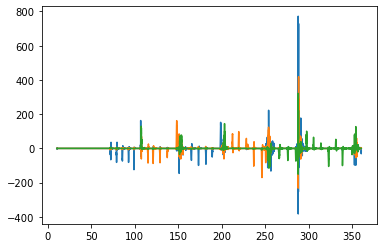

In [5]:
### finds calibartion coeffecients for the gyroscope triad ###
# this section is very slow due to neededing to intergrate all the gyroscope measumernts from the data table for each cost function evaluation


data=[]
with open("xxxxx.csv") as file: # opens data file (replace xxxxx with file name)
    data = pd.read_csv(file, delimiter=',',skiprows=[2])
    
### Characterise data ###
leng=data.shape[0]
calib_length=6000

### remove gyroscope offsets from data ###
cl,cm,cn,cost_count=0,0,0,0
cost_count=0

for row in range(0,calib_length): # calauclates zero offset
    cl=cl+data.loc[row,"vl"]/calib_length
    cm=cm+data.loc[row,"vm"]/calib_length
    cn=cn+data.loc[row,"vn"]/calib_length
    
for row in range(0,leng): # removes zero offset
    data.loc[row,"t"]=data.loc[row,"t"]/1000
    data.loc[row,"vl"]=data.loc[row,"vl"]-cl
    data.loc[row,"vm"]=data.loc[row,"vm"]-cm
    data.loc[row,"vn"]=data.loc[row,"vn"]-cn
    
def callbackF(Xi,report):
    print("number of iterations: ", report.nit)
    
    print(Xi)


def gyro_cost(g_coeff): # defines the cost function
    g_tab=np.zeros([leng,3])
    
    Tg=np.array([[1,-g_coeff[0],g_coeff[1]],[g_coeff[2],1,-g_coeff[3]],[-g_coeff[4],g_coeff[5],1]])
    Kg=np.array([[g_coeff[6],0,0],[0,g_coeff[7],0],[0,0,g_coeff[8]]])
    
    for row in range(0,leng):
        g_vec=[data.loc[row,"vl"],data.loc[row,"vm"],data.loc[row,"vn"]]
        g_calib= Tg @ Kg @ g_vec
        g_tab[row,:]=g_calib[:]
    
    cost=0
    
    for pos in range(1,a_vec_count-1):

        qc=func.quaternion([1,0,0,0])
        aq_i=func.quaternion([0,a_tab[pos,0],a_tab[pos,1],a_tab[pos,2]])
        a_vec_f=np.array([a_tab[pos+1,0],a_tab[pos+1,1],a_tab[pos+1,2]])
        
        for row in range(int(a_tab[pos,4]),int(a_tab[pos+1,3])): # intergrates gyroscope reaigs between data collection periods
        
            dt=P.loc[r,"t"]-P.loc[r-1,"t"]
            w1=np.array([P.loc[r-1,"vl"],P.loc[r-1,"vm"],P.loc[r-1,"vn"]])
            w2=np.array([P.loc[r,"vl"],P.loc[r,"vm"],P.loc[r,"vn"]])
            [qc,qw]=func.RK4(qc,w1,w2,dt)

        qcc=np.conjugate(qc)
        aq_g=qcc*aq_i*qc
        ag_vec=np.array([aq_g.x.real,aq_g.y.real,aq_g.z.real])
 
        cost=cost+np.linalg.norm(a_vec_f-ag_vec)
            
    return(cost)

i_chosen=10 # specify which set of accelerometer calibration coeffiencents you want to use
a_vec_count=arrayDict["a_array_" + str(i_chosen)].shape[0]
a_tab=np.zeros([a_vec_count,5])
a_tab[:,:]=arrayDict["a_array_" + str(i_chosen)][:,:]

a_coeff=np.zeros(9)
a_coeff[:]=coeff_matrix[i_chosen-1,0:9]

for pos in range(1,a_vec_count):
    [a_tab[pos,0],a_tab[pos,1],a_tab[pos,2]]=h([a_tab[pos,0],a_tab[pos,1],a_tab[pos,2]],a_coeff)

### performs the minimisation to calcualte the calibration coeffiecients ###

print("optimistaion initialised")
print("[ T_01 T_02 T_10 T_12 T_20 T_21 K_00 K_11 K_22 ]")
gyro_coeff_init=[0.02312425,-0.0231861,0.0108204,0.00681461,0.00386604,-0.01418564,1.1327276,1.16329074,1.13570487] # initilisation values or minimisation
gyro_bounds=opt.Bounds([-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,1,1,1],[0.1,0.1,0.2,0.1,0.1,0.1,1.2,1.2,1.3])
gyro_result=opt.minimize(gyro_cost , gyro_coeff_init , callback=callbackF , tol=1e-3 , method='trust-constr', options={'xtol':1e-8, 'gtol':1e-8, 'maxiter':1000, 'verbose':1, 'disp': True}, bounds=gyro_bounds) 
    
### prints out final calibartaion coeefienct result along with the reisdual
print(gyro_result.x)
print(gyro_result.optimality)
